This notebook is an example how to use DeGirum PySDK to do AI inference of a graphical file using two AI models: person detection and pose detection

In [1]:
# import DeGirum PySDK
import degirum as dg

In [2]:
# connect to default model zoo
ai_server_address = None # fill in the IP address of AI server. Use localhost if running locally
zoo = dg.connect_model_zoo(ai_server_address)

In [19]:
# load models for DeGirum Orca AI accelerator
# (change model name to "...n2x_cpu_1" to run it on CPU)
people_det_model = zoo.load_model("yolo_v5s_person_det--512x512_quant_n2x_orca_1")
pose_model = zoo.load_model("mobilenet_v1_posenet_coco_keypoints--353x481_quant_n2x_orca_1")

# adjust some model properties
pose_model.overlay_show_labels = False
pose_model.overlay_line_width = 1
pose_model.overlay_alpha = 1
pose_model._model_parameters.PoseThreshold = 0.5

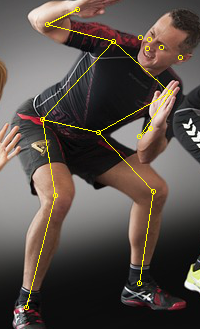

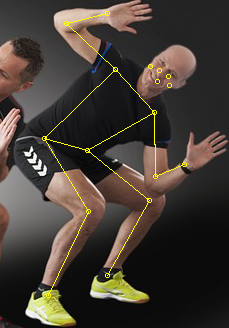

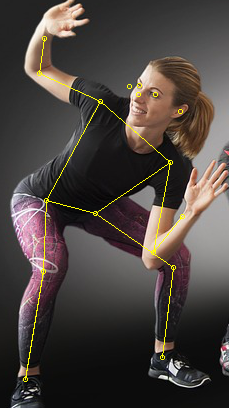

In [20]:
# detect persons
people = people_det_model('./images/poses_three_persons.jpg')

# for each detected person detect poses
for person in people.results:
    person_box = people.image.crop(person['bbox'])
    poses = pose_model(person_box)
    display(poses.image_overlay)

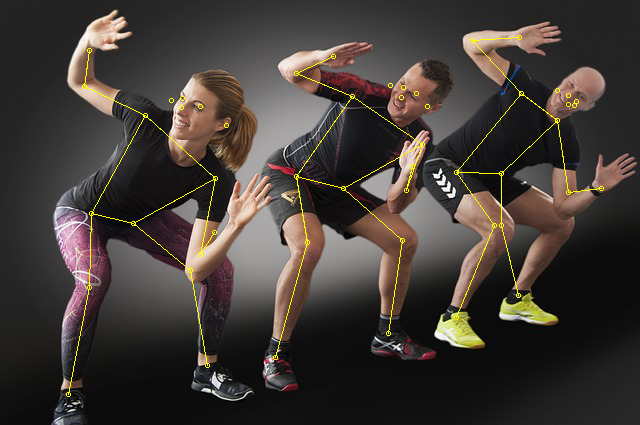

In [21]:
# alternatively, detect all poses
all_poses = pose_model('./images/poses_three_persons.jpg')
display(all_poses.image_overlay)